# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_raisin = pd.read_excel("Raisin_Dataset.xlsx")

In [4]:
df = df_raisin.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753
Class,900.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000


In [8]:
df.Class.value_counts()

0    450
1    450
Name: Class, dtype: int64

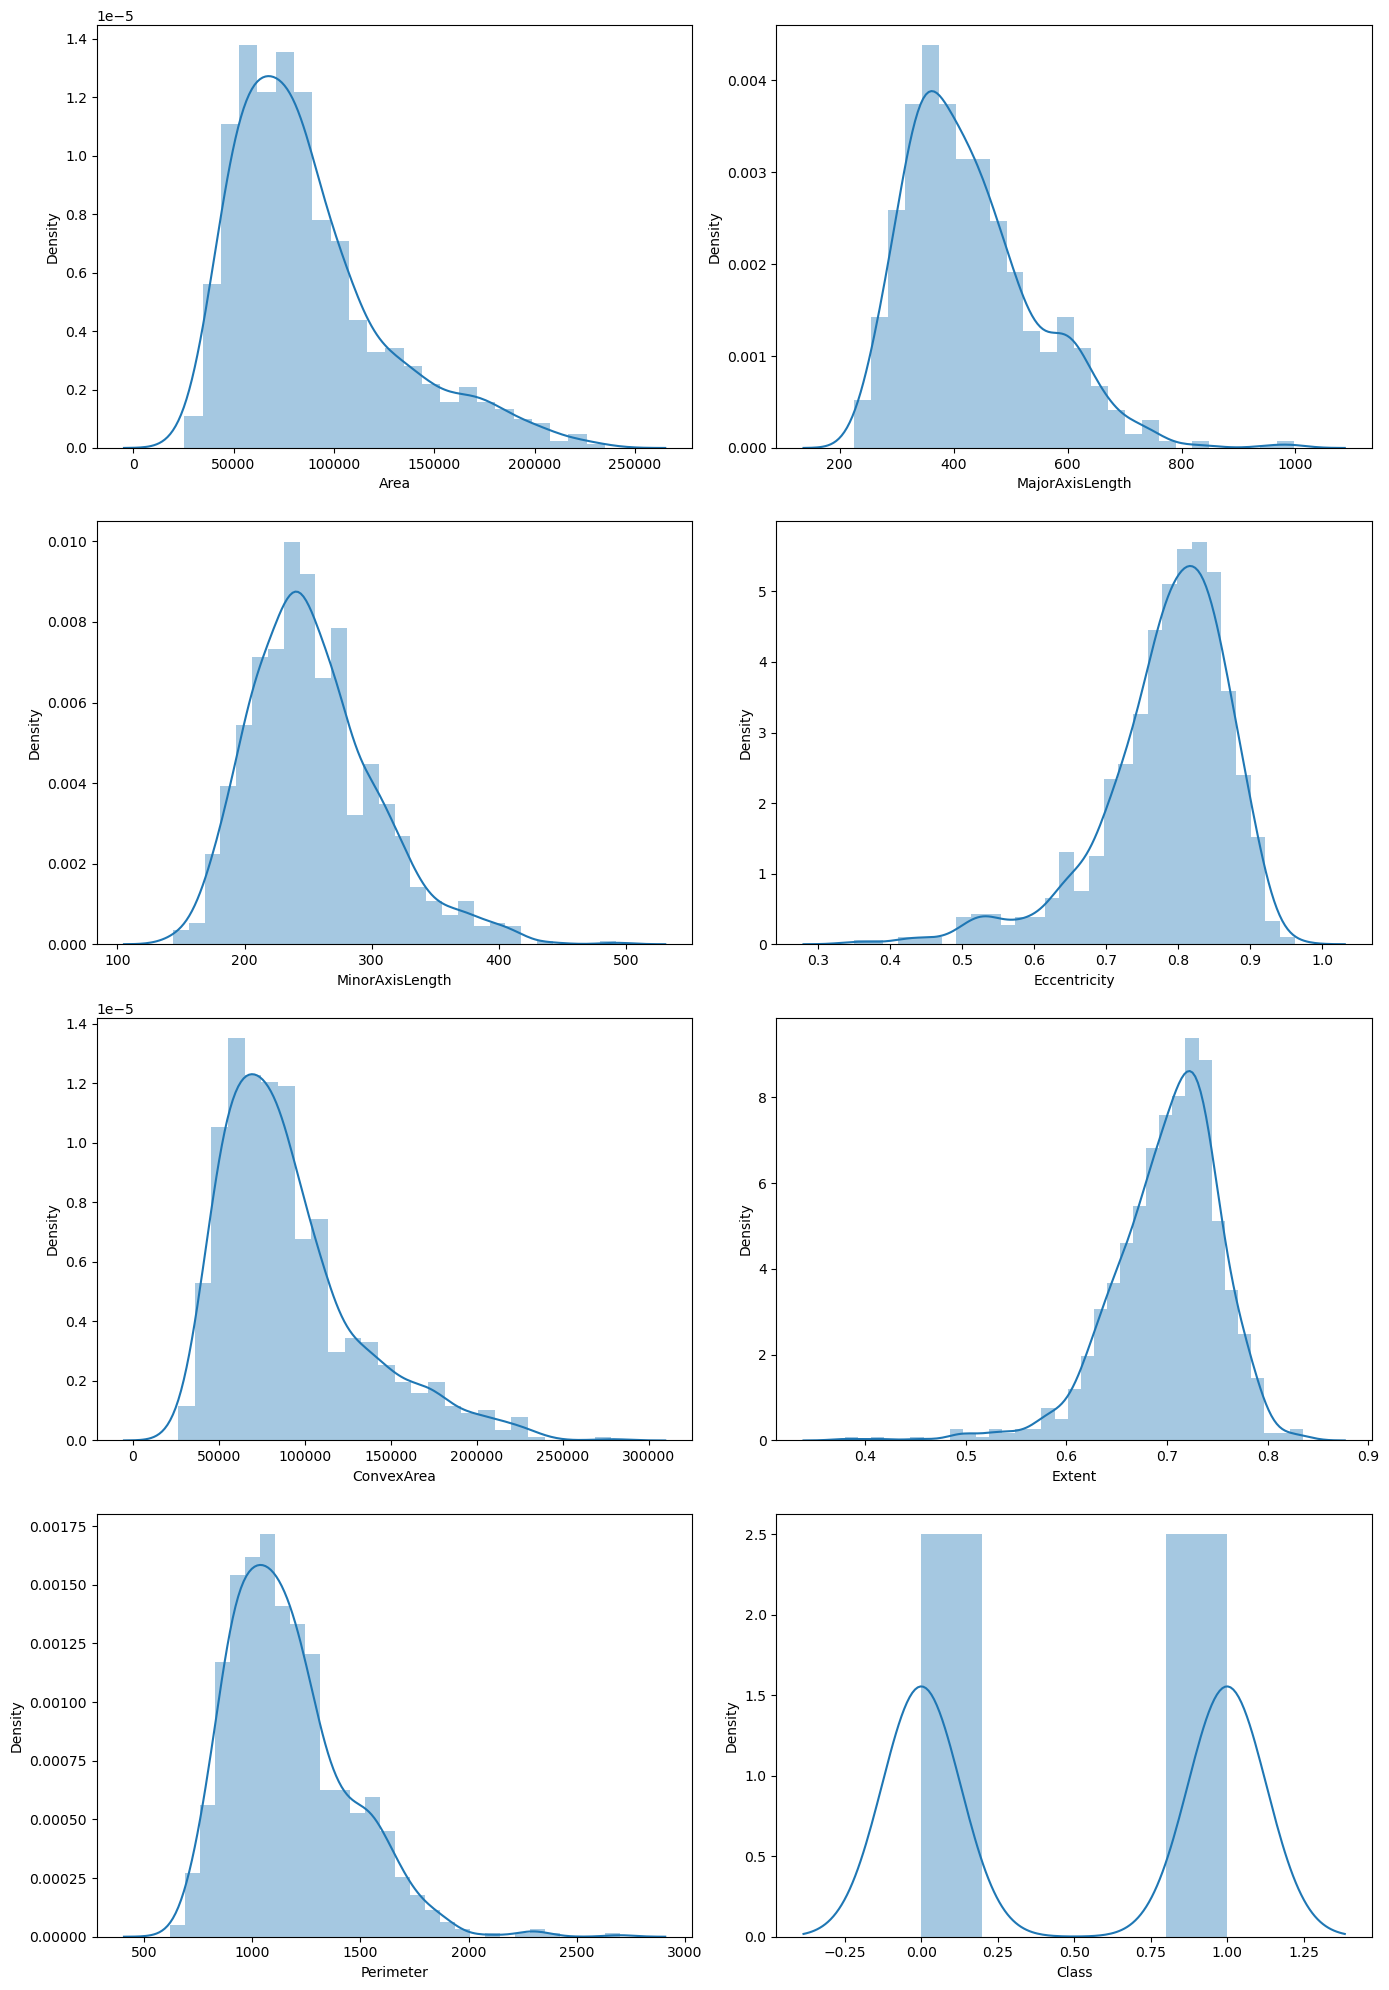

In [9]:
plt.figure(figsize = (14, 20))
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(4, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [10]:
from summarytools import dfSummary

dfSummary(df)

ModuleNotFoundError: No module named 'summarytools'

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot = True);

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

In [ ]:
df.corr()["Class"].drop("Class").sort_values().plot.barh()
plt.show()

## Train | Test Split and Scaling

In [ ]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) 

# scale.fit işlemini sadece X_train uygulanır

In [ ]:
X_test_scaled = scaler.transform(X_test)

# X_test'e transform yapılır.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled,y_train)

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled) ## olasılık hesaplarını görmek için kullanılan kod
y_pred_proba

## Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:

print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(log_model, X_test_scaled, y_test);



In [ ]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

### Cross Validate

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

In [ ]:
print("Test Set")
print(classification_report(y_test,y_pred))

print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression(max_iter=10000, 
                               random_state =42,)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "solver": ['liblinear', 'saga'],
    "penalty": penalty,
     "C" : C
}


grid_model = GridSearchCV(log_model,
                          param_grid = param_grid,
                          cv=10)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_ # default: accuracy

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

In [ ]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

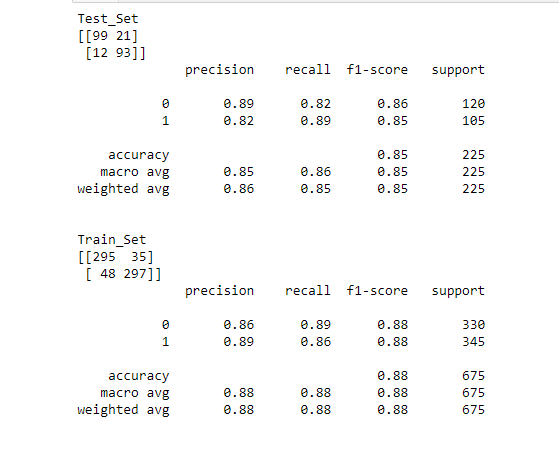

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [ ]:
#plot_roc_curve(log_model, X_test_scaled, y_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba[:,1])


In [ ]:
#plot_precision_recall_curve(log_model, X_test_scaled, y_test);


In [ ]:
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

# Conclusion 

## Final Model

In [ ]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) #scale modelimi kayıt ediyorum

In [ ]:
X_scaled_raisin = scaler.transform(X) #sonra transform yapıyorum

In [ ]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)#final modelimi oluşturuyorum

In [ ]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))#onuda kayıt ediyorum

In [ ]:
X.describe().T#describe bakıyorum ki buradaki skorlara yakın skorlar verip tahmin yapacağı

In [ ]:
my_dict = {"Area": [110804.128, 50804.128, 80804.128],
           "MajorAxisLength": [400.930, 200.930, 500.930],
           "MinorAxisLength": [200.488, 280.488, 225.488],
           "Eccentricity": [0.482, 0.682, 0.882],
           "ConvexArea": [80186.090, 100186.090, 12086.090],
           "Extent": [0.482, 0.682, 0.882], 
           "Perimeter": [1065.907, 1865.907, 2265.907], 
          }
sample = pd.DataFrame(my_dict)
sample

In [ ]:
final_model.predict(sample)

In [ ]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb")) # model load edilir

In [ ]:
sample_raisin_scaled = scaler_raisin.transform(sample) 

# modele (scaler_hearing) df (sample) verilir

sample_raisin_scaled

In [ ]:
final_model = pickle.load(open("final_model_raisin", "rb"))

# Model kuruldu

In [ ]:
predictions = final_model.predict(sample_raisin_scaled) 
predictions
# final modele predict için scale edilen sample verilir

In [ ]:
predictions_proba = final_model.predict_proba(sample_raisin_scaled) 
# samplenin proba değerlerini alırız

predictions_proba

In [69]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,110804.128,400.930,200.488,0.482,80186.090,0.482,1065.907,1,0.398,0.602
1,50804.128,200.930,280.488,0.682,100186.090,0.682,1865.907,1,0.012,0.988
2,80804.128,500.930,225.488,0.882,12086.090,0.882,2265.907,1,0.000,1.000


## Final Model with GridSearch

In [70]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l1', 'solver': 'saga'}

In [71]:
final_model_new = LogisticRegression(C=0.42813323987193935, penalty='l1', solver='liblinear').fit(X_scaled_raisin, y)


In [72]:
prediction2 = final_model_new.predict(sample_raisin_scaled)
prediction_proba2 = final_model_new.predict_proba(sample_raisin_scaled)

In [73]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,110804.128,400.930,200.488,0.482,80186.090,0.482,1065.907,1,0.398,0.602
1,50804.128,200.930,280.488,0.682,100186.090,0.682,1865.907,1,0.012,0.988
2,80804.128,500.930,225.488,0.882,12086.090,0.882,2265.907,1,0.000,1.000


# with pipeline

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [188]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [192]:
pipe_model = Pipeline(steps=operations)

In [193]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [194]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

## Changing the parameters of the pipe_model

In [200]:
pipe_model.get_params() 

# Seçtiğimiz ML algoritmasına göre ilgili parametre listesini getirir.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [199]:
pipe_model.set_params(logistic__max_iter=100)

# Yukarıdaki listeden ihtiyaç duyulan parametre değişikliği yapar.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## GridSearch on Pipeline

In [203]:
from sklearn.model_selection import GridSearchCV

In [83]:

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "logistic__solver": ['liblinear', 'saga'],
    "logistic__penalty": penalty,
     "logistic__C" : C
}

In [84]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [85]:
pipe_model = Pipeline(steps=operations)

In [113]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= "accuracy")

In [204]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [205]:
pipe_grid.best_params_

{'logistic__C': 0.8858667904100825,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [206]:
pipe_grid.best_score_ # accuracy

0.8680555555555556

## Final pipe_model 

In [180]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression(C = 0.8858667904100825,
                                             penalty = 'l1',
                                             solver = 'liblinear'))]

# LogisticRegression içindeki hyperparametreleri pipe_grid.best_params_'dan aldık.

In [181]:
pipe_final = Pipeline(operations)

In [207]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.8858667904100825, penalty='l1',
                                    solver='liblinear'))])

## Predict New Observations with pipe_model

In [183]:
new_obs = {"Area": [110804.128, 50804.128, 80804.128],
           "MajorAxisLength": [400.930, 200.930, 500.930],
           "MinorAxisLength": [200.488, 280.488, 225.488],
           "Eccentricity": [0.482, 0.682, 0.882],
           "ConvexArea": [80186.090, 100186.090, 12086.090],
           "Extent": [0.482, 0.682, 0.882], 
           "Perimeter": [1065.907, 1865.907, 2265.907], 
          }
samples = pd.DataFrame(new_obs)
samples

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,110804.128,400.930,200.488,0.482,80186.090,0.482,1065.907
1,50804.128,200.930,280.488,0.682,100186.090,0.682,1865.907
2,80804.128,500.930,225.488,0.882,12086.090,0.882,2265.907


In [184]:
predictions = pipe_final.predict(samples)
predictions

array([0, 1, 1], dtype=int64)

In [208]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[6.19602627e-01, 3.80397373e-01],
       [7.79283219e-05, 9.99922072e-01],
       [1.10468523e-07, 9.99999890e-01]])

In [209]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,110804.128,400.930,200.488,0.482,80186.090,0.482,1065.907,0,0.620,0.380
1,50804.128,200.930,280.488,0.682,100186.090,0.682,1865.907,1,0.000,1.000
2,80804.128,500.930,225.488,0.882,12086.090,0.882,2265.907,1,0.000,1.000
